# Expectation Maximisation for GMM.

Use Dataset C for learning the parameters of a GMM using Expectation maximization. Set the number of components as 3. 

Plot the contours of the estimated components at init, and after 1 EM iteration, 2 EM iterations, 4 EM iterations and 8 EM iterations. (A single elliptical contour for each component is sufficient.) Add the scatterplot of the data points too here. 

Also, estimate plot the log likelihood of the data and the lower bound L(q,\theta) that is optimised as a function of the EM iteration number.

Expected output: 4 plots giving the component means and variances along with the scatterplot. One plot giving iterations vs L(q;theta) and ln P(X|theta).

You may use the code below for plotting the elliptical contours of the estimated components. It requires you to pass the axes of the plot figure as an argument.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

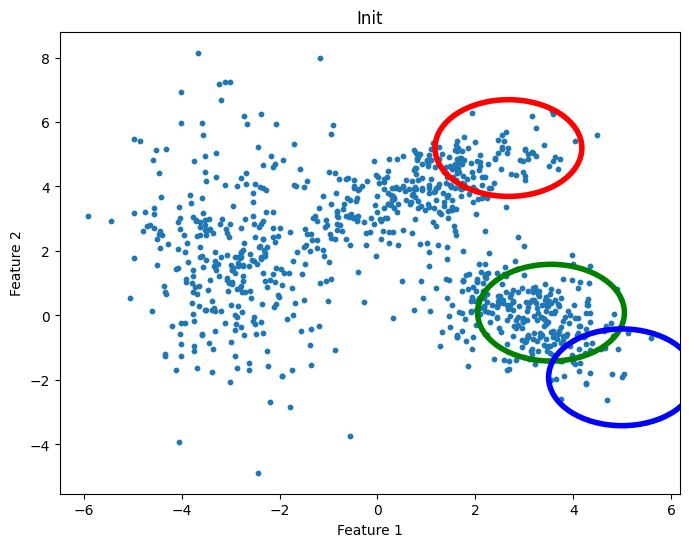

In [2]:
# Load the dataset
dataC = np.load("Data/dataset_C.npy")

# Initialize parameters
np.random.seed(42)
n_samples, n_features = dataC.shape
n_components = 3

# The means are randomly chosen from the data points
means = dataC[np.random.choice(n_samples, n_components, replace=False)]

# Convariance matrices are initialized as identity matrices
covariances = np.array([np.eye(n_features)] * n_components)  

# The weights are initialized to be equal
weights = np.ones(n_components) / n_components

def multivariate_gaussian(x, mean, cov):
    size = len(x)
    det = np.linalg.det(cov)
    const = 1.0 / (np.power((2 * np.pi), size / 2) * np.sqrt(det))
    x_ = x - mean
    inv_cov = np.linalg.inv(cov)
    exponential_term = np.exp(-0.5 * np.dot(np.dot(x_.T, inv_cov), x_))
    return const * exponential_term

def compute_log_likelihood(X, weights, means, covariances):
    log_likelihood = 0
    for i in range(n_samples):
        temp = 0
        for k in range(n_components):
            temp += weights[k] * multivariate_gaussian(X[i], means[k], covariances[k])
        log_likelihood += np.log(temp)
    return log_likelihood

def compute_lower_bound(gamma, weights, means, covariances):
    lower_bound = 0
    for i in range(n_samples):
        for k in range(n_components):
            lower_bound += gamma[i, k] * (np.log(weights[k] + 1e-10) + np.log(multivariate_gaussian(dataC[i], means[k], covariances[k]) + 1e-10))
    return lower_bound

def plot_ellipses_gmm(means, covariances,ax):
    color_list = ['r','g','b','k']
    for i,(mean,cov) in enumerate(zip(means,covariances)):
        
        v1,w1=np.linalg.eigh(cov)
        u = w1[0] / np.linalg.norm(w1[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v1 *= 3
        ell = Ellipse(xy=mean, width=v1[0], height=v1[1], angle=180 + angle,
                  edgecolor=color_list[i], lw=4, facecolor='none')
        ax.add_artist(ell)

log_likelihoods = []
lower_bounds = []
iterations = [1, 2, 4, 8]

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(dataC[:, 0], dataC[:, 1], s=10)
plot_ellipses_gmm(means, covariances, ax)
ax.set_title(f'Init')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
plt.show()



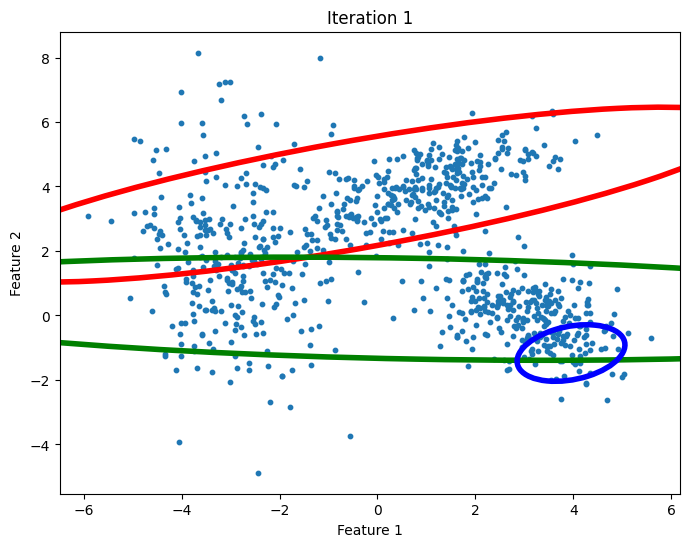

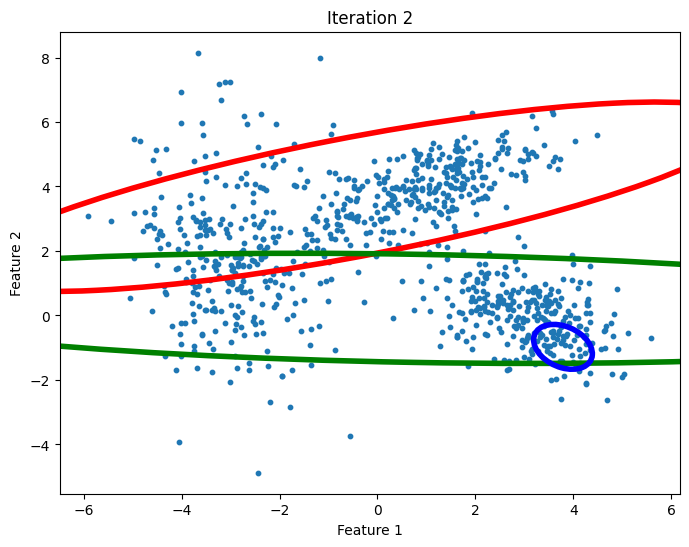

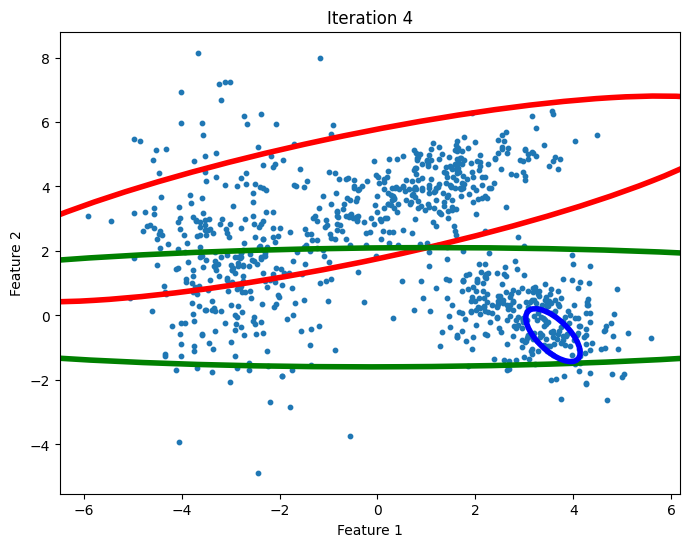

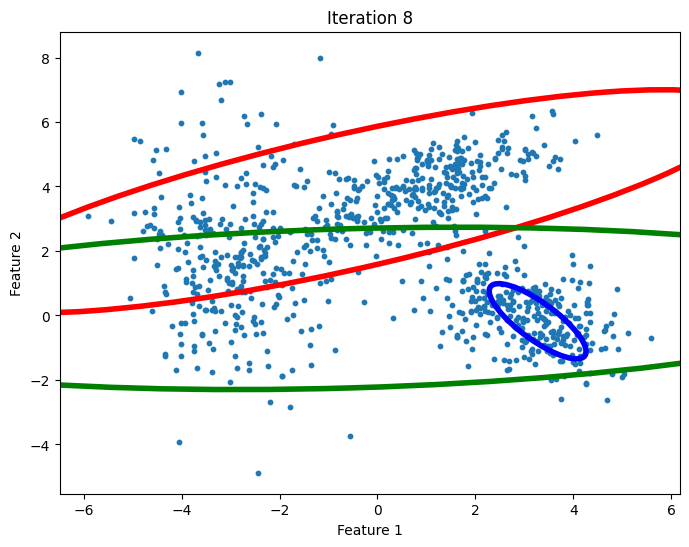

In [3]:
# Code write: Get the four plots with component contours here

# Perform EM algorithm
for iteration in range(1, 9):
    # E-step
    gamma = np.zeros((n_samples, n_components))
    for i in range(n_samples):
        for k in range(n_components):
            gamma[i, k] = weights[k] * multivariate_gaussian(dataC[i], means[k], covariances[k])
        gamma[i, :] = gamma[i, :] / np.sum(gamma[i, :])

    # M-step
    Nk = np.sum(gamma, axis=0)
    means = np.dot(gamma.T, dataC) / Nk[:, np.newaxis]
    for k in range(n_components):
        diff = dataC - means[k]
        covariances[k] = np.dot(gamma[:, k] * diff.T, diff) / Nk[k]
    weights = Nk / n_samples

    # Compute log-likelihood
    log_likelihood = compute_log_likelihood(dataC, weights, means, covariances)
    log_likelihoods.append(log_likelihood)
    lower_bound = compute_lower_bound(gamma, weights, means, covariances)
    lower_bounds.append(lower_bound)

    # Plotting at specified iterations
    if iteration in iterations:
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(dataC[:, 0], dataC[:, 1], s=10)
        plot_ellipses_gmm(means, covariances, ax)
        ax.set_title(f'Iteration {iteration}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        plt.show()


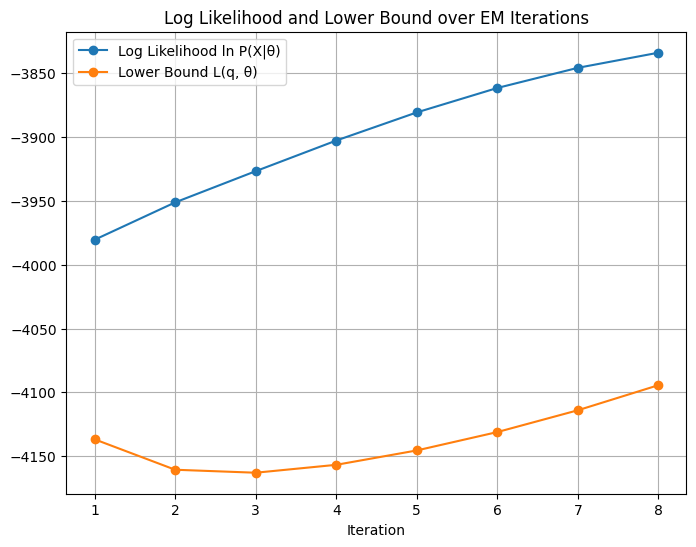

In [4]:
#Code write: Get the plot of iterations vs L(q;theta) and ln P(X|theta) here. 

# Plot log-likelihood over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1,9), log_likelihoods, marker='o', label='Log Likelihood ln P(X|θ)')
plt.plot(range(1,9), lower_bounds, marker='o', label='Lower Bound L(q, θ)')
plt.title('Log Likelihood and Lower Bound over EM Iterations')
plt.xlabel('Iteration')
plt.legend()
plt.grid()
plt.show()